In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gzbuilder_analysis.spirals import xy_from_r_theta
import gzbuilder_analysis.spirals.metric as metric

In [2]:
t = np.linspace(0, np.pi, 10)

r1 = np.exp(np.tan(np.deg2rad(20)) * t)
line1 = np.array(xy_from_r_theta(r1, t - 0.1))

r2 = np.exp(np.tan(np.deg2rad(25)) * t)
line2 = np.array(xy_from_r_theta(r2 * 0.9, t))[:, ::-1]

In [3]:
def __t(a, b):
    # construct our tensor (allowing vectorization)
    # m{i, j, k, p}
    # i iterates over each point in a
    # j cycles through each pair of points in b
    # k cycles through (a[i], b[j], b[j+1])
    # p each of which has [x, y]
    m = np.zeros((a.shape[0], b.shape[0] - 1, 3, 2))
    m[:, :, 0, :] = np.transpose(
        np.tile(a, [m.shape[1] + 1, 1, 1]),
        axes=[1, 0, 2]
    )[:, :-1, :]
    m[:, :, 1, :] = np.tile(b, [a.shape[0], 1, 1])[:, :-1, :]
    m[:, :, 2, :] = np.tile(
        np.roll(b, -1, axis=0), [a.shape[0], 1, 1]
    )[:, :-1, :]
    # t[i, j] = ((a[i] - b[j]) . (b[j + 1] - b[j])) / (b[j + 1] - b[j]|**2
    t = metric.v_calc_t(np.array(m))
    return t, m

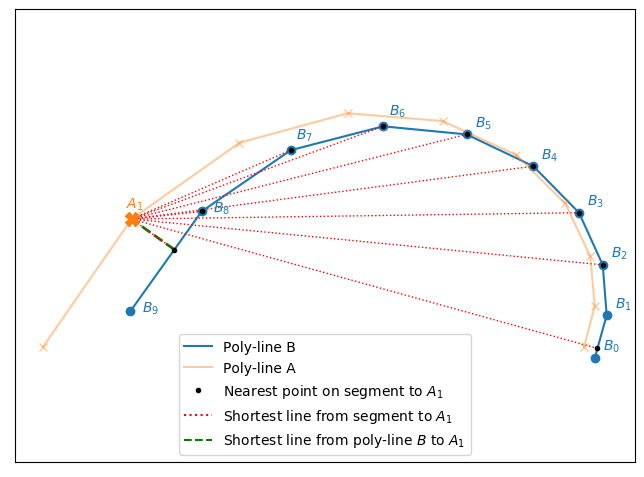

In [6]:
plt.figure(figsize=(8, 6), dpi=100)
t, m = __t(line2.T, line1.T)
plt.plot(*line1, '-', label='Poly-line B')
plt.plot(*line1, 'C0o')
i = 1
points = line1.T[:-1] + (t[i] * (line1[:, 1:] - line1[:, :-1])).T
min_j = np.argmin((np.add.reduce((points - line2.T[i]), axis=1)**2))
for j, p in enumerate(points):
    if j == min_j:
        plt.plot(
            *np.stack((p, line2.T[i]), axis=1),
            '--', c='g', lw=2
        )
    plt.plot(
        *np.stack((p, line2.T[i]), axis=1),
        ':', c='r', lw=1
    )
offsets = (
    *[(0.1, 0)]*2, *[(0.05, 0.1)]*2, *[(0.07, 0.07)]*6, 
)[::-1]
for j, point in enumerate(line1.T):
    plt.text(*(point + offsets[j]), '$B_{}$'.format(j), c='C0')
plt.text(*(line2.T[i] + (-0.05, 0.1)), '$A_{}$'.format(i), c='C1')
plt.plot(*line2, 'C1-', alpha=0.4, label='Poly-line A')
plt.plot(*line2, 'C1x', alpha=0.4)
plt.plot(*line2.T[i], 'C1X', markersize=10)
plt.axis('equal')
plt.plot(*points.T, 'k.', label='Nearest point on segment to $A_1$')
plt.plot([], [], 'r:', label='Shortest line from segment to $A_1$')
plt.plot([], [], 'g--', label='Shortest line from poly-line $B$ to $A_1$')
plt.legend()
plt.xticks([])
plt.yticks([])
plt.savefig(
    'method-paper-plots/spiral_metric_description.pdf',
    bbox_inches='tight'
)

In [5]:
help(metric.get_diff)

Help on function get_diff in module gzbuilder_analysis.spirals.metric:

get_diff(t, a)

